In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle #cp drive/My\ Drive/freelancer-works/my-freelancer-dataset.zip .

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!unzip datazip.zip

Archive:  datazip.zip
  inflating: DataSet/Readme.txt      
  inflating: DataSet/train13519.csv  
  inflating: DataSet/train13619.csv  
  inflating: DataSet/train13720.csv  
  inflating: DataSet/train13820.csv  
  inflating: DataSet/train13919.csv  
  inflating: DataSet/train14019.csv  
  inflating: DataSet/train14119.csv  
  inflating: DataSet/train14120.csv  
  inflating: DataSet/train14219.csv  
  inflating: DataSet/train14420.csv  
  inflating: DataSet/train14519.csv  
  inflating: DataSet/train14619.csv  
  inflating: DataSet/train14719.csv  
  inflating: DataSet/train14720.csv  
  inflating: DataSet/train14819.csv  
  inflating: DataSet/train14820.csv  
  inflating: DataSet/train14919.csv  
  inflating: DataSet/train14920.csv  
  inflating: DataSet/train15120.csv  
  inflating: DataSet/train16019.csv  
  inflating: DataSet/train16020.csv  
  inflating: DataSet/train20501.csv  
  inflating: DataSet/train20803.csv  
  inflating: DataSet/train24902.csv  
  inflating: DataSet/train24

In [ ]:
import pandas as pd
df =pd.read_csv('/content/train14820.csv')
df

,timestamp,hourly_traffic_count
0,2015-10-04 00:00:00,16
1,2015-10-04 00:05:00,10
2,2015-10-04 00:10:00,5
3,2015-10-04 00:15:00,14
4,2015-10-04 00:20:00,12
...,...,...
26491,2016-01-03 23:35:00,12
26492,2016-01-03 23:40:00,14
26493,2016-01-03 23:45:00,18
26494,2016-01-03 23:50:00,17


In [ ]:
df.describe()

,hourly_traffic_count
count,26496.000000
mean,19.455314
std,22.681442
min,0.000000
25%,0.000000
50%,9.000000
75%,35.000000
max,164.000000


In [ ]:
df['timestamp'] = df['timestamp'].astype('datetime64[ns]')
df['weekday'] = df['timestamp'].dt.weekday

# Feature engineering with the date
df['year']= df['timestamp'].dt.year
df['month']= df['timestamp'].dt.month
df['day']= df['timestamp'].dt.day

df.head(3)

original_df = df.copy()
df

,timestamp,hourly_traffic_count,weekday,year,month,day
0,2015-10-04 00:00:00,16,6,2015,10,4
1,2015-10-04 00:05:00,10,6,2015,10,4
2,2015-10-04 00:10:00,5,6,2015,10,4
3,2015-10-04 00:15:00,14,6,2015,10,4
4,2015-10-04 00:20:00,12,6,2015,10,4
...,...,...,...,...,...,...
26491,2016-01-03 23:35:00,12,6,2016,1,3
26492,2016-01-03 23:40:00,14,6,2016,1,3
26493,2016-01-03 23:45:00,18,6,2016,1,3
26494,2016-01-03 23:50:00,17,6,2016,1,3


Visualization

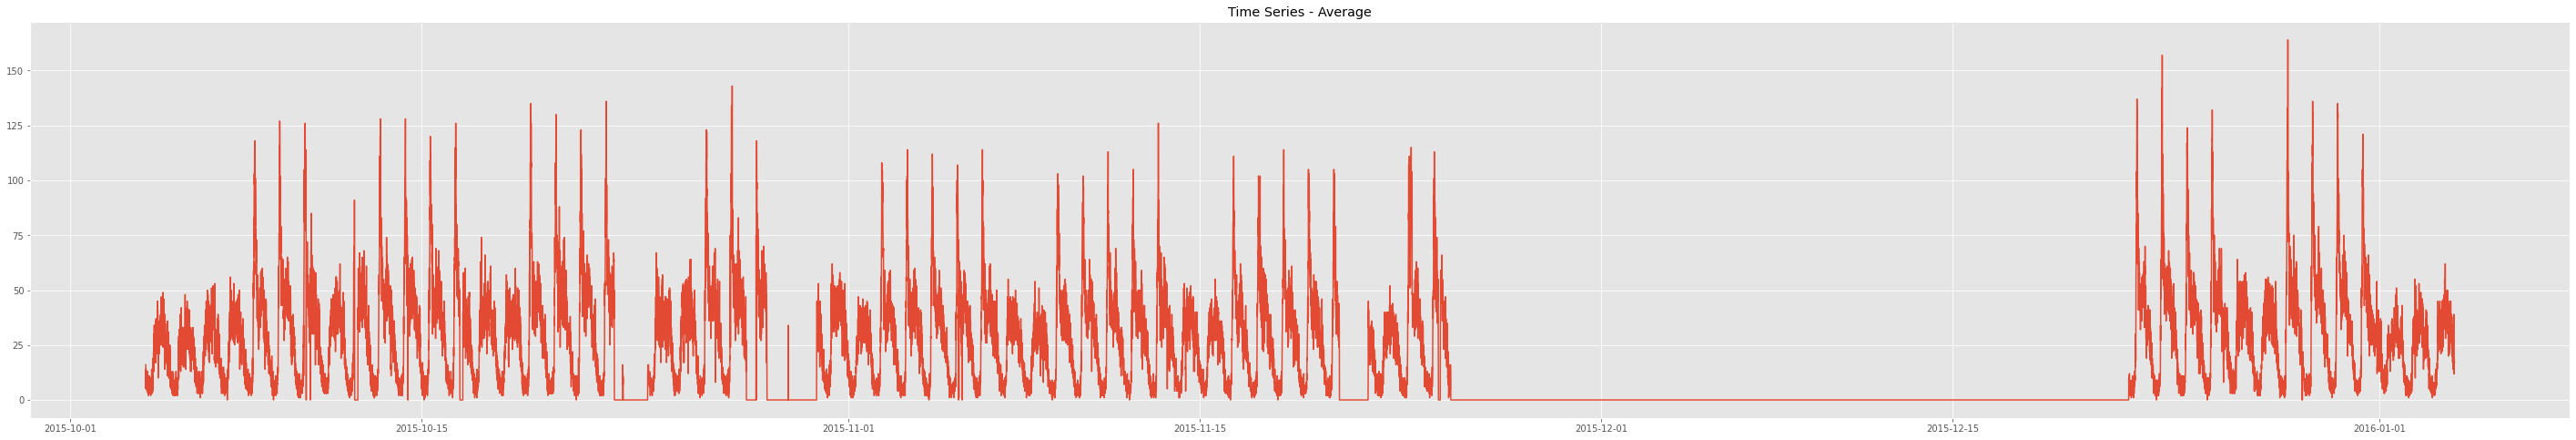

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(50, 8))
mean_group = df[['timestamp','hourly_traffic_count']].groupby(['timestamp'])['hourly_traffic_count'].mean()
plt.plot(mean_group)
plt.title('Time Series - Average')
plt.show()

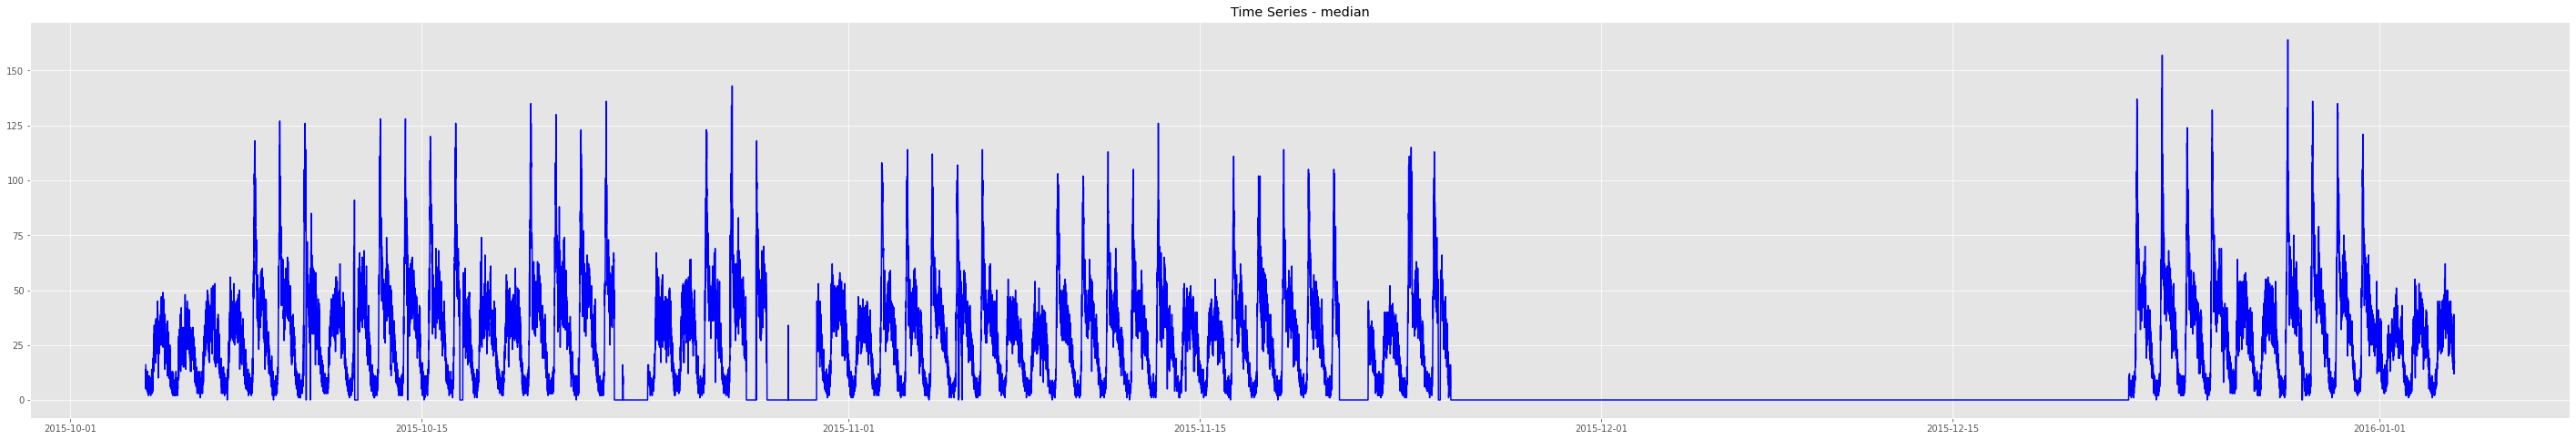

In [ ]:
plt.figure(figsize=(50, 8))
median_group = df[['timestamp','hourly_traffic_count']].groupby(['timestamp'])['hourly_traffic_count'].median()
plt.plot(median_group, color = 'b')
plt.title('Time Series - median')
plt.show()

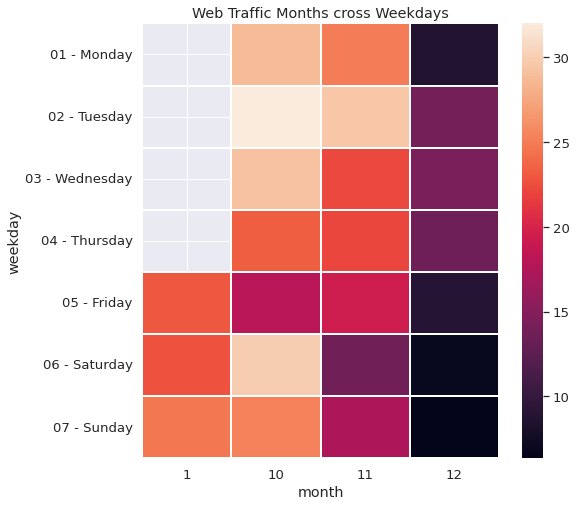

In [ ]:

df['weekday_num'] = df['weekday']
df['weekday'].replace(0,'01 - Monday',inplace=True)
df['weekday'].replace(1,'02 - Tuesday',inplace=True)
df['weekday'].replace(2,'03 - Wednesday',inplace=True)
df['weekday'].replace(3,'04 - Thursday',inplace=True)
df['weekday'].replace(4,'05 - Friday',inplace=True)
df['weekday'].replace(5,'06 - Saturday',inplace=True)
df['weekday'].replace(6,'07 - Sunday',inplace=True)

train_group = df.groupby(["month", "weekday"])['hourly_traffic_count'].mean().reset_index()
train_group = train_group.pivot('weekday','month','hourly_traffic_count')
train_group.sort_index(inplace=True)

import seaborn as sns
sns.set(font_scale=1.2)

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(train_group, annot=False, ax=ax, fmt="d", linewidths=2)
plt.title('Web Traffic Months cross Weekdays')
plt.show()


In [ ]:
times_series_means =  pd.DataFrame(mean_group).reset_index(drop=False)
times_series_means['weekday'] = times_series_means['timestamp'].apply(lambda x: x.weekday())
times_series_means['Date_str'] = times_series_means['timestamp'].apply(lambda x: str(x))
times_series_means[['year','month','day']] = pd.DataFrame(times_series_means['Date_str'].str.split('-',2).tolist(), columns = ['year','month','day'])
date_staging = pd.DataFrame(times_series_means['day'].str.split(' ',2).tolist(), columns = ['day','other'])
times_series_means['day'] = date_staging['day']*1
times_series_means.drop('Date_str',axis = 1, inplace =True)
del times_series_means['timestamp']
times_series_means.head()

,hourly_traffic_count,weekday,year,month,day
0,16.0,6,2015,10,04
1,10.0,6,2015,10,04
2,5.0,6,2015,10,04
3,14.0,6,2015,10,04
4,12.0,6,2015,10,04


In [ ]:

from sklearn.model_selection import train_test_split

X, y = times_series_means.drop(['hourly_traffic_count','year'],axis=1), times_series_means['hourly_traffic_count']
trainx, testx, trainy, testy = train_test_split(X, y, test_size=0.2)


# Linear Model
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score

def modelisation(x_tr, y_tr, x_ts, y_ts, model):
    # Modelisation with all product
    model.fit(x_tr, y_tr)

    prediction = model.predict(x_ts)
    r2 = r2_score(y_ts.to_numpy(), model.predict(x_ts))
    mae = mean_absolute_error(y_ts.to_numpy(), model.predict(x_ts))
    print ("-----------------------------------------------")
    print ("mae with 80% of the data to train:", mae)
    print ("-----------------------------------------------")

    return  prediction, model

model =  AdaBoostRegressor(n_estimators = 5000, random_state = 42, learning_rate=0.01)

prediction, clr = modelisation(trainx, trainy, testx, testy, model)

-----------------------------------------------
mae with 80% of the data to train: 15.539029692154752
-----------------------------------------------


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   timestamp             26496 non-null  datetime64[ns]
 1   hourly_traffic_count  26496 non-null  int64         
 2   weekday               26496 non-null  object        
 3   year                  26496 non-null  int64         
 4   month                 26496 non-null  int64         
 5   day                   26496 non-null  int64         
 6   weekday_num           26496 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.4+ MB
